# Price Suggestion & Modelling

Problem Statement:
It can be hard to know how much something’s really worth. Lets say we have two sweaters and now in order to decide what price the product should have is a task. 
Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

Challenges to Solve:
Given details about a product like product category name, brand name, and item condition, our challenge is to build an algorithm that automatically suggests the right product prices. This way the human interfernce in giving price suggestions reduces manifolds and thereby it increases the efficiency also. 


The task of this Project is to build an algorithm that suggests the right product prices from product name, category name, brand name, item condition, and shipping information.

The goal is about creating a model that would help sellers to price their products.Pricing should be intermediate between sellers and buyers


Our Objectives: • Data Cleaning • Feature Engineering • Using various Machine Learning Models

Exploratory Data Analysis:

Gathering as many insights as possible through Exploratory Data Analysis. Giving the relation between various independent variable and dependent variables so that visual representation could be drawn For the visual representation, various plots have been used such as boxplot, bar plots, pie charts etc

Feature Engineering : The various variables has been checked if there are any null values to be taken care of and those null values has been replaced accordingly One Hot Encoding has been done on variables so that we can get the data in numeric format as machine learning cant understand raw text and finally various models has been applied

Modelling: The given problem is exactly about predicting the price, which is a real-valued value, thus it falls into the Regression Category, thereby have used SGD, Ridge Regression and Linear Regression Finally, pretty table has been made so that the rmse could be figured out for the models Trying to provide some interpretability and evolving our ways to handle the upcoming problems as we proceed through our project



# MODELS USED 

Linear Regression,
Ridge Regression,
LAasso Regression,
Stochastic Gradient Descent Regressor

# DATA DESCRIPTION

train_id - the id of the product

name - the name of the product

item_condition_id - the condition of the product provided by the seller

According to information available 

1 stands for new
2 stands for fairly new
3 stands for Good
4 stands for Bad
5 stands for Very Poor
category_name - category of the product

brand_name - brand name of the product

price - the price that the product was sold for. (This is the target variable that we will predict) The unit is USD

shipping - 1 if shipping fee is paid by seller and 0 by buyer



Independent variables: train_id, name, item_condition_id, category_name, brand_name, shipping

Target Variable: price

Various supervised machine learning regression models will be built  and see which succeeds in solving the given mapping between the input variables and the price feature in the best way.


# EXPLORATORY DATA ANALYSIS

The very first step in solving any case study in data science is to properly look and analyze the data you have.

It helps to give valuable insights into the pattern and information it has to convey.

Statistical tools have a big role in proper visualization of the data.

Even though it is considered not a very important part of solving a problem, but successful data scientists and ML engineers spend maximum part of solving a problem by analyzing the data they have.

Proper EDA gives interesting features of your data which in turn influences our data preprocessing and model selection criterion as well.

# IMPOTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings


import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor



# LOADING THE DATA

In [2]:
data = pd.read_csv('C:/Users/hp/opera autoupdate/Desktop/Imarticus Arun/train2 - Copy.csv', encoding='latin1')

In [3]:
data.head(3)
data1=data.drop("Unnamed: 7", axis=1)

In [4]:
data1.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping
0,0,Hero 77 fountain pen,2,Other/Office supplies/Writing,NaN,12.0,1
1,1,14K Yellow Gold Earrings,3,Women/Jewelry/Earrings,NaN,20.0,0
2,2,New balance 2-in 1 size S dry fit shorts,2,Women/Athletic Apparel/Shorts,New Balance,10.0,0
3,3,Zella black workout tank w mesh cut out,3,Women/Athletic Apparel/Shirts & Tops,Zella,15.0,1
4,4,NWT Lilly Pulitzer gabby dress sz 8,1,"Women/Dresses/Above Knee, Mini",Lilly Pulitzer,75.0,0


In [5]:
data1.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
dtype: object

In [6]:
data1.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping'],
      dtype='object')

In [7]:
data1.shape

(148253, 7)

In [8]:
#CHECKING THE NULL VALUES
data1.isnull().sum()

train_id                 0
name                     0
item_condition_id        0
category_name          641
brand_name           62991
price                    0
shipping                 0
dtype: int64

# HANDLING THE NULL VALUES

In [9]:
for value in ['category_name']:
    data1[value].fillna(value='Other', inplace=True) 
    # replacing by "Other" because there already exists a category by the same name

for value in ['brand_name']:
    data1[value].fillna(value='Unknown', inplace=True)


In [10]:
data1.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
dtype: int64

# Analysis of variables

# PRICE

In [11]:
data1.price.describe()

count    148253.000000
mean         26.807933
std          39.358186
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2000.000000
Name: price, dtype: float64

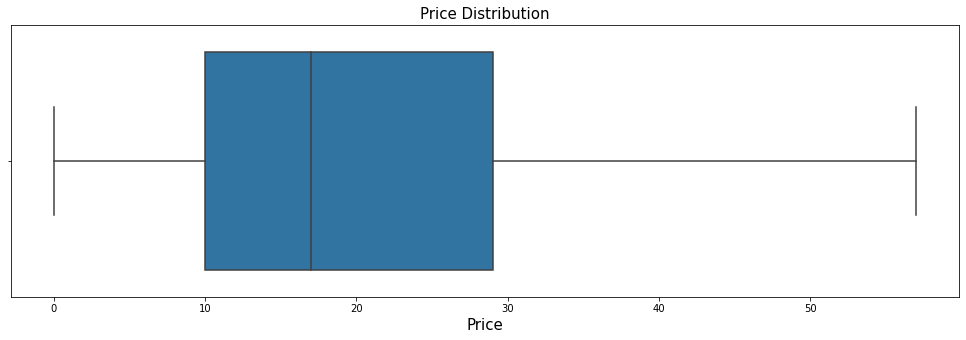

In [12]:
plt.figure(figsize=(17,5))
plt.title('Price Distribution', fontsize=15)
sns.boxplot(data1.price, showfliers=False)
plt.xlabel('Price',fontsize=15)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

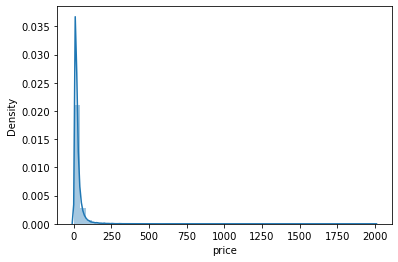

In [13]:
plt.plot(figsize=(30,20))
sns.distplot(data1['price'])

It can be concluded that the distribution of the price variable is heavily right-skewed.
The price variable follows a skewed distribution and in order to make errors on low price product more relevant than for higher prices, we take the log transform
log1p = log(p) + 1, we add 1 to avoid zero(log0=infinity) and negative values
Our dependent variable should be normally distributed i.e. The Assumption of Normality should be satisfied

Text(0.5, 1.0, 'Price Distribution')

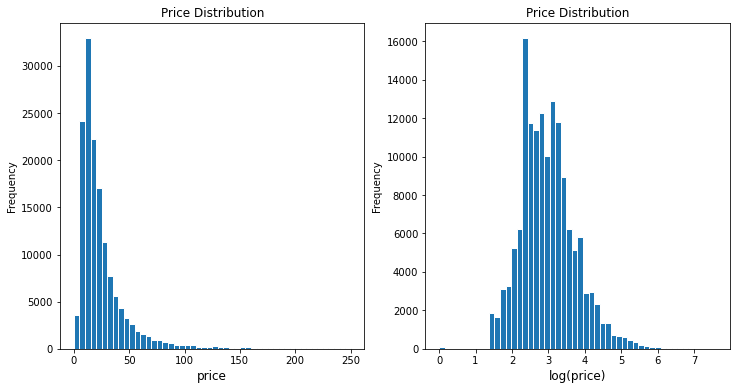

In [14]:
plt.subplot(1, 2, 1)
(data1['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log1p(data1['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor='white')
plt.xlabel('log(price)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

# Shipping

In [15]:
data1['shipping'].value_counts(normalize=True)

0    0.553587
1    0.446413
Name: shipping, dtype: float64

Text(0.5, 1.0, 'Analysis on Shipping Paid')

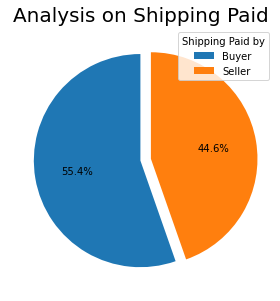

In [16]:
index = ['Buyer','Seller']
values =  data1['shipping'].value_counts()
plt.figure(figsize=(7,4))
plt.pie(values,startangle=90,autopct='%0.1f%%',explode=(0,0.1))
plt.legend(title = "Shipping Paid by",loc = "upper right",labels= index,fontsize=10)
plt.tight_layout()
plt.title("Analysis on Shipping Paid",fontsize=20)

Insight 1 from shipping:

0- 82071 times (buyer charged) 55.53%
1- 66182 times(seller charged) 44.64%
Over 55% of items' shipping fee were paid by the buyers
Suggestion to the seller:

The above insight matches with our perception that the sellers need to keep a lower price to compensate for the additional shipping

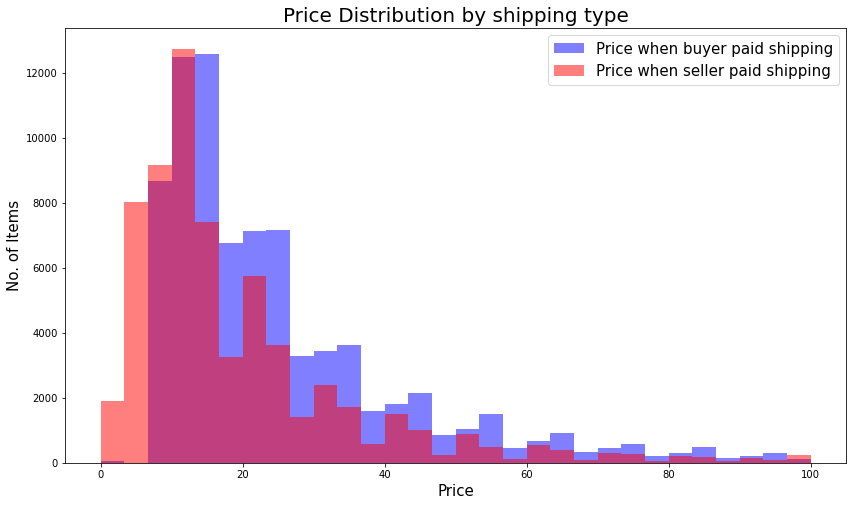

In [17]:
buyer_charged = data1.loc[data1['shipping'] == 0, 'price']
seller_charged = data1.loc[data1['shipping'] == 1, 'price']


fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(buyer_charged, bins=30, range=[0, 100], label='Price when buyer paid shipping', alpha=0.5, color='b')
ax.hist(seller_charged, bins=30, range=[0, 100], label='Price when seller paid shipping', alpha=0.5, color='r')
plt.title('Price Distribution by shipping type', fontsize = 20)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('No. of Items', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Insight 2 from shipping:

The price when buyer pays is high compared to when seller pay

In [18]:
# average price for shipping for seller and buyer
print('The average price is {}'.format(round(seller_charged.mean(), 2)), 'if seller pays shipping')
print('The average price is {}'.format(round(buyer_charged.mean(), 2)), 'if buyer pays shipping')

The average price is 22.82 if seller pays shipping
The average price is 30.02 if buyer pays shipping


# Category Name

In [19]:
print('There are', data1['category_name'].nunique(), 'unique values in category name column')

There are 1052 unique values in category name column


In [20]:
data1['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 6049
Women/Tops & Blouses/T-Shirts                                  4686
Beauty/Makeup/Face                                             3429
Beauty/Makeup/Lips                                             3025
Electronics/Video Games & Consoles/Games                       2587
Beauty/Makeup/Eyes                                             2560
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    2464
Women/Underwear/Bras                                           2088
Women/Tops & Blouses/Blouse                                    2073
Women/Dresses/Above Knee, Mini                                 2029
Name: category_name, dtype: int64

It is seen in this table that a subcategory in the category name is seperated by a slash "/"
For ex. Beauty/Makeup/Face and Beauty/Makeup/Lips

This means Beauty category has a subcategory MakeUp and this sub category MakeUp is further divided into Face and Lips

It is also observed that Women apparel has the maximum number of items followed by any other category.

The category names are listed by ‘/’ delimiter which tells about the main category, sub-category 1 and sub-category 2 of the products.
Therefore, to get better idea of each product, we will do feature engineering here and split the category name into 3 different columns namely, ‘Main_categ’, ‘sub_categ1’ and ‘sub_categ2’.

Divide category names into Main category, Sub-category 1 and Sub-category 2:

In [21]:
temp = data1[data1['brand_name']!='Unknown'] # remove Unknown coz it represents missing values
data1[['Main_categ','sub_categ1','sub_categ2']] = data1.category_name.str.split("/",expand = True,n= 2)
for i in ['sub_categ1','sub_categ2']:
    data1[i].fillna(value = "Label not given", inplace=True)

In [22]:
print('There are', data1['Main_categ'].nunique(), 'unique values in Main category')
print('There are', data1['sub_categ1'].nunique(), 'unique values in Sub-category 1')
print('There are', data1['sub_categ2'].nunique(), 'unique values in Sub-category 2')

There are 10 unique values in Main category
There are 114 unique values in Sub-category 1
There are 741 unique values in Sub-category 2


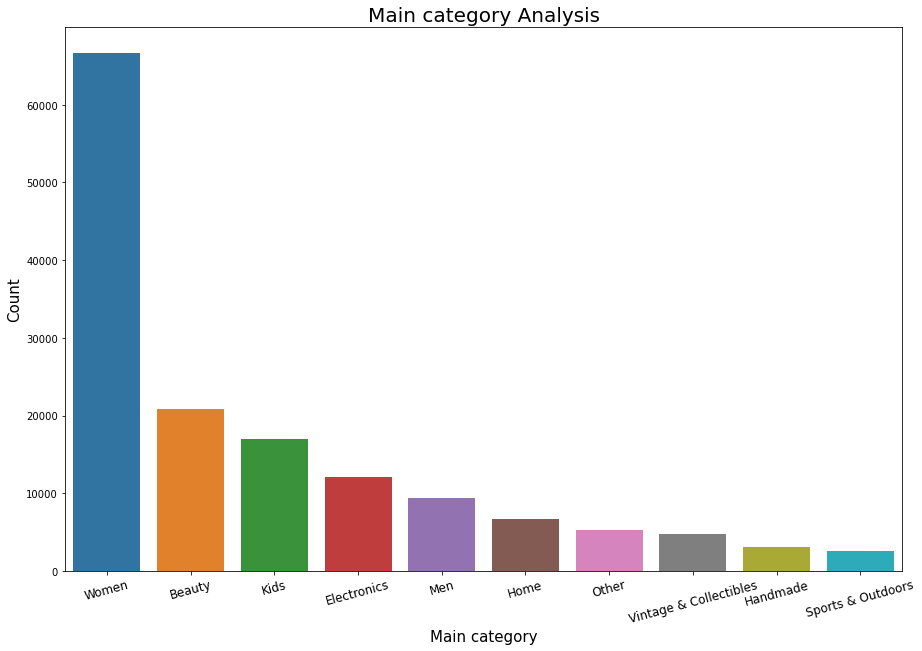

In [23]:
maincat_count = data1.Main_categ.value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(maincat_count.index[0:11], maincat_count[0:11])
plt.title('Main category Analysis',fontsize = 20)
plt.xlabel('Main category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation=15, fontsize=12)
plt.show()

Insight 1 from Main Category:

It can be said that Women products occur with the maximum frequency, followed by Beauty products. The 3rd largest general category is owned by Kids products

# MAIN CATEGORY VS PRICE

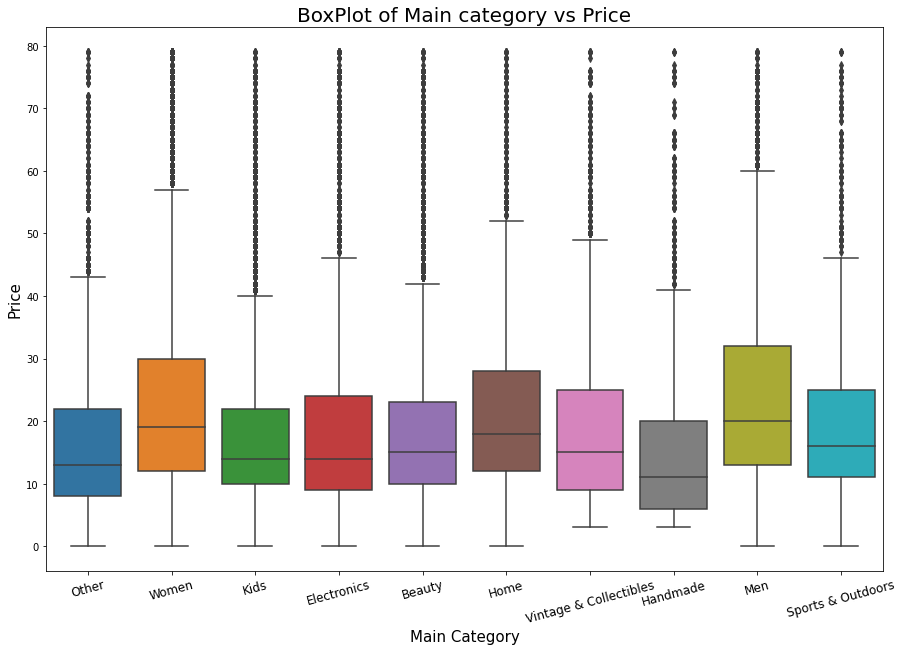

In [24]:
temp = data1[data1['price'] < 80]
plt.figure(figsize=(15, 10))
sns.boxplot(temp['Main_categ'], temp['price'])
plt.title('BoxPlot of Main category vs Price', fontsize = 20)
plt.xlabel('Main Category',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(rotation = 15, fontsize=12)
plt.show()

In [25]:
temp.groupby(['Main_categ'])['price'].agg('median')

Main_categ
Beauty                    15.0
Electronics               14.0
Handmade                  11.0
Home                      18.0
Kids                      14.0
Men                       20.0
Other                     13.0
Sports & Outdoors         16.0
Vintage & Collectibles    15.0
Women                     19.0
Name: price, dtype: float64

Although there are maximum products purchased in the Women's category, the price of Men category products(20 dollars) is almost as expensive as the products in Women category(19 dollars)

In [26]:
index = []
[index.append(key) for key, value in Counter(data1['sub_categ1']).most_common()]
top_10 = index[:10]
temp = data1[data1['sub_categ1'].isin(top_10)] 
# the corresponding top 10 indexes get their corresponding names from "sub_categ1"

Text(0, 0.5, 'Frequency')

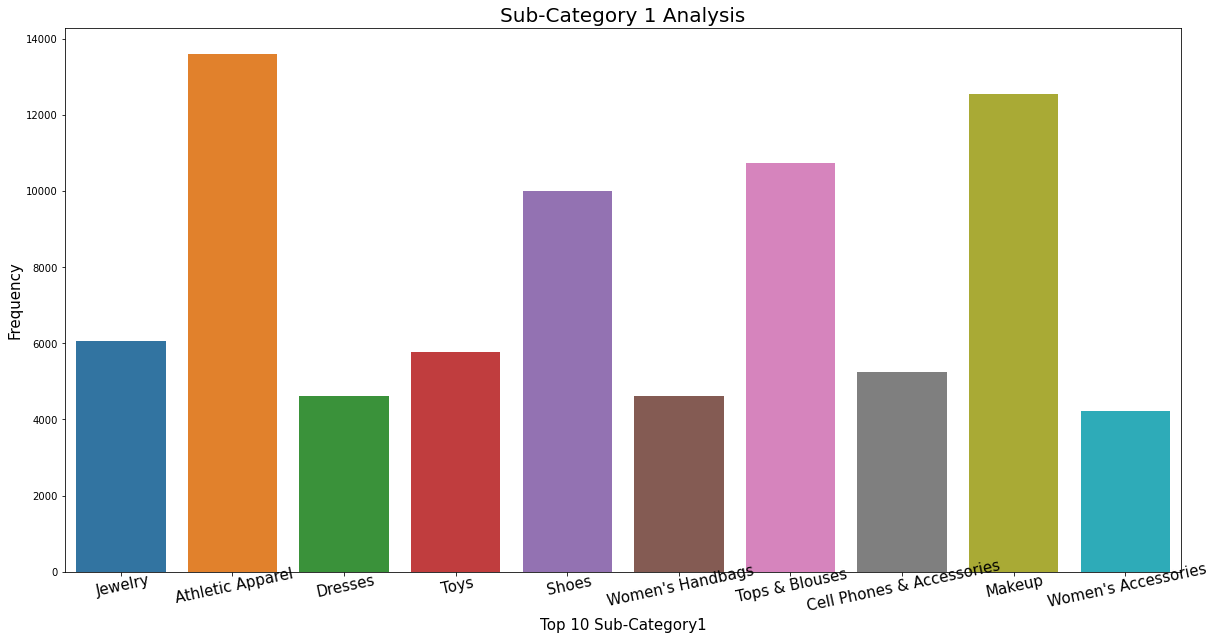

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ1'])
plt.title('Sub-Category 1 Analysis',fontsize = 20)
plt.xticks(rotation = 12,wrap = True,fontsize = 15)
plt.xlabel('Top 10 Sub-Category1',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

Insight 1 from Sub-category 1:

Most of the products from Sub-category 1 are bought from Athletic Apparel and Makeup category

# SUB CATEGORY 1 VS PRICE

Text(0, 0.5, 'Price')

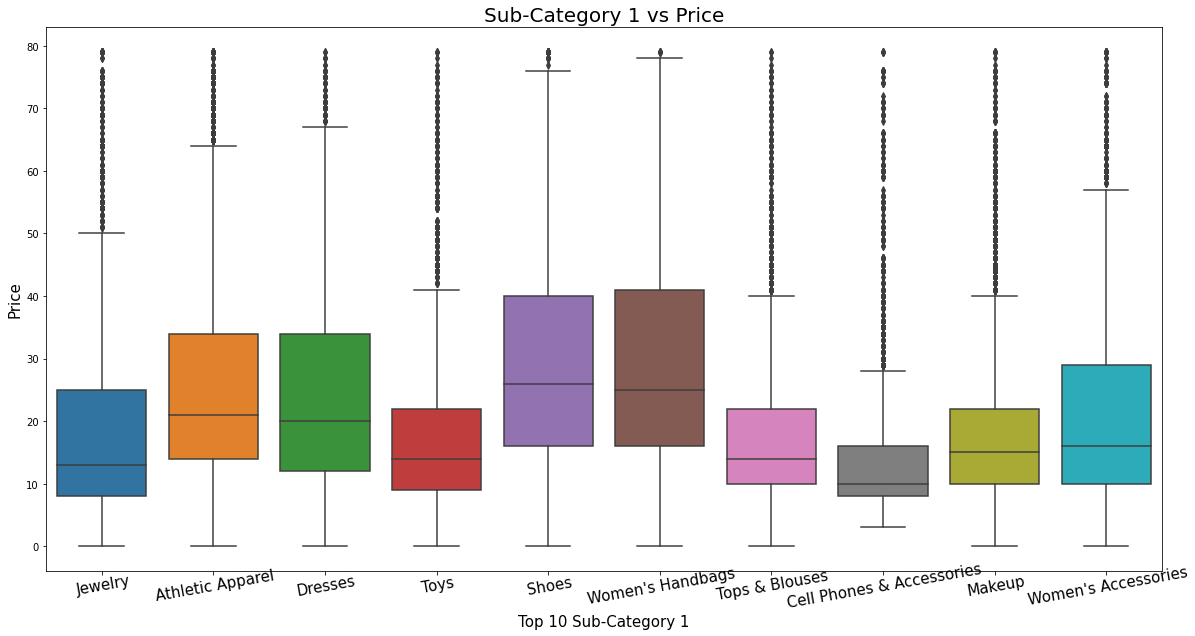

In [28]:
temp2 = temp[temp['price']<80] # box plot
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ1'],temp2['price'])
plt.title('Sub-Category 1 vs Price',fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 15)
plt.xlabel('Top 10 Sub-Category 1',fontsize = 15)
plt.ylabel('Price',fontsize = 15)


In [29]:
temp2.groupby(['sub_categ1'])['price'].agg('median')

sub_categ1
Athletic Apparel             21.0
Cell Phones & Accessories    10.0
Dresses                      20.0
Jewelry                      13.0
Makeup                       15.0
Shoes                        26.0
Tops & Blouses               14.0
Toys                         14.0
Women's Accessories          16.0
Women's Handbags             25.0
Name: price, dtype: float64

Insight 2 from Sub-category 1:

Products in Shoes category is more expensive than Women's Handbag by 1 dollar
Products in Women's Handbag category is more expensive thus has low frequency
Hence its satisfies the logic that Expensive products are bought less number of times

Text(0, 0.5, 'Frequency')

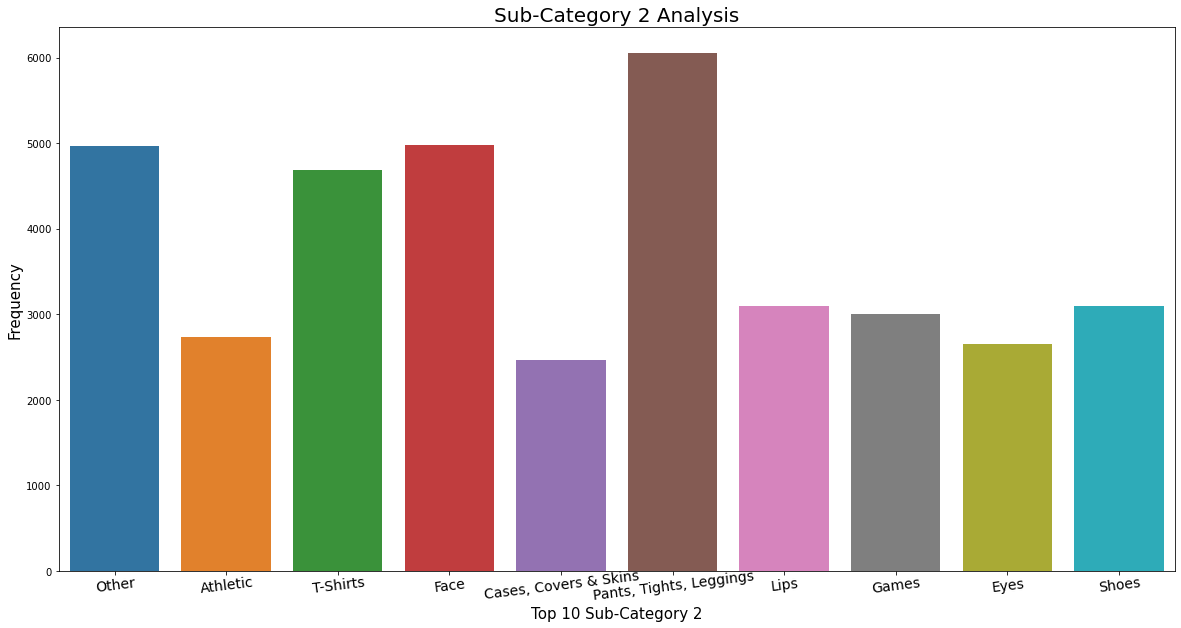

In [30]:
index = []
[index.append(key) for key, value in Counter(data1['sub_categ2']).most_common()]
top_10 = index[:10]
temp = data1[data1['sub_categ2'].isin(top_10)]

plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ2'])
plt.title('Sub-Category 2 Analysis',fontsize = 20)
plt.xticks(rotation = 7,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

Products under category Pants,Tights,Leggings are bought the highest number of times

# SUB CATEGORY 2 VS PRICE

Text(0, 0.5, 'Price')

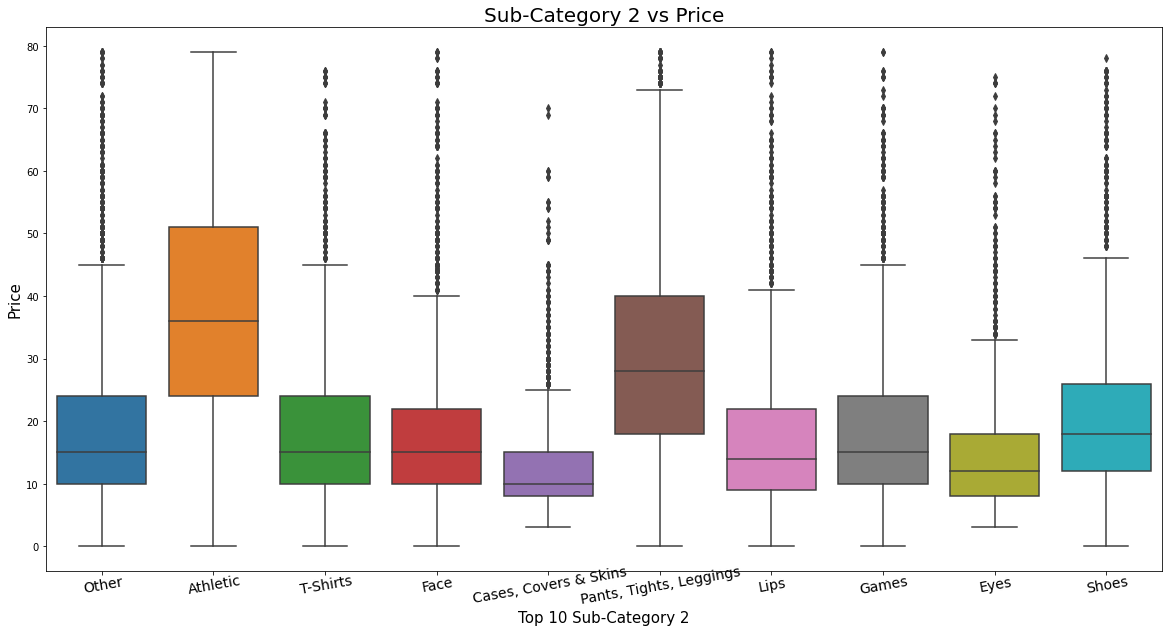

In [31]:
temp2 = temp[temp['price']<80]
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ2'],temp2['price'])
plt.title('Sub-Category 2 vs Price', fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

In [32]:
temp2.groupby(['sub_categ2'])['price'].agg('median')

sub_categ2
Athletic                   36.0
Cases, Covers & Skins      10.0
Eyes                       12.0
Face                       15.0
Games                      15.0
Lips                       14.0
Other                      15.0
Pants, Tights, Leggings    28.0
Shoes                      18.0
T-Shirts                   15.0
Name: price, dtype: float64

Yet again products in the Athletic category are bought moderately as they are expensive
Products in Pants,Tights,Leggings category are bought more as moderately expensive

# Brand Name

In [33]:
print('There are', data1['brand_name'].nunique(), 'unique values in brand name column')

There are 2321 unique values in brand name column


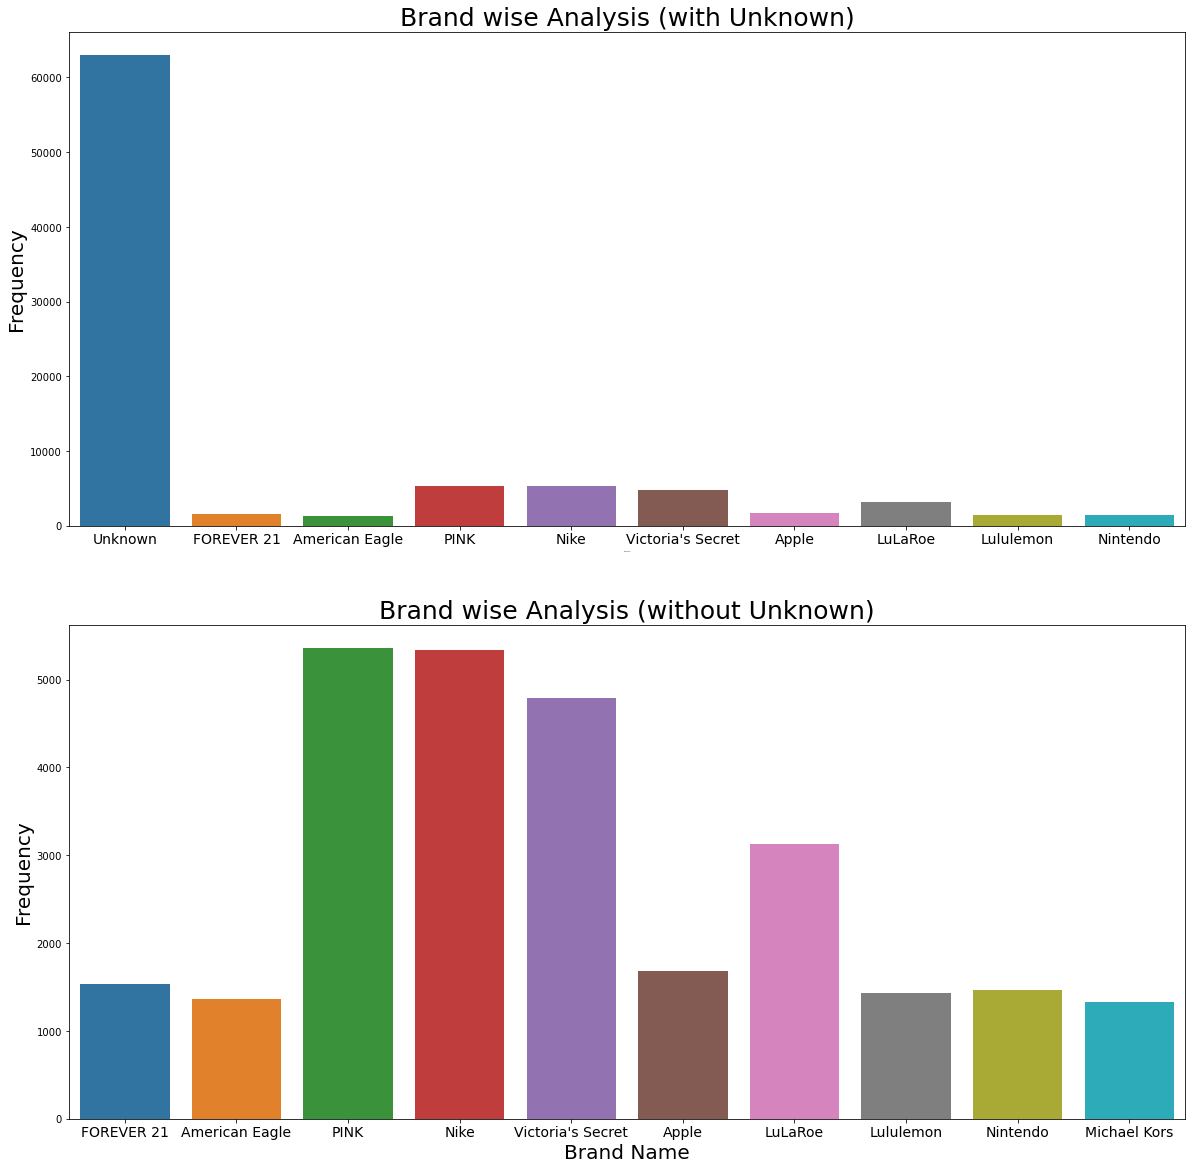

In [34]:
index = []
[index.append(key) for key, value in Counter(data1['brand_name']).most_common()]
top_10 = index[:10]
temp = data1[data1['brand_name'].isin(top_10)]

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.countplot(temp['brand_name'])
plt.title('Brand wise Analysis (with Unknown)', fontsize = 25)
plt.xticks(rotation = 0,wrap = True,fontsize = 14)
plt.xlabel('Brand Name',fontsize = 0)
plt.ylabel('Frequency', fontsize = 20)

temp = data1[data1['brand_name']!='Unknown']
index = []
[index.append(key) for key, value in Counter(temp['brand_name']).most_common()]
top_10 = index[:10]
temp2 = temp[temp['brand_name'].isin(top_10)]

plt.subplot(2,1,2)
# plt.figure(figsize=(40,20))
sns.countplot(temp2['brand_name'])
plt.title('Brand wise Analysis (without Unknown)', fontsize = 25)
plt.xticks(rotation = 0,wrap = True,fontsize = 14)
plt.xlabel('Brand Name',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.show()


We ignore the Brand name marked as Unknown as it represents our missing values
Hence we make the graph again without considering the Unknown
We observe that Pink, Nike, and Victoria's Secret are top 3 most purchased brands
Also it is obvious that Pink and Victoria's Secret brand products are mostly bought from Women main category more frequently

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FOREVER 21'),
  Text(1, 0, 'American Eagle'),
  Text(2, 0, 'PINK'),
  Text(3, 0, 'Nike'),
  Text(4, 0, "Victoria's Secret"),
  Text(5, 0, 'LuLaRoe'),
  Text(6, 0, 'Lululemon'),
  Text(7, 0, 'Nintendo'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Michael Kors')])

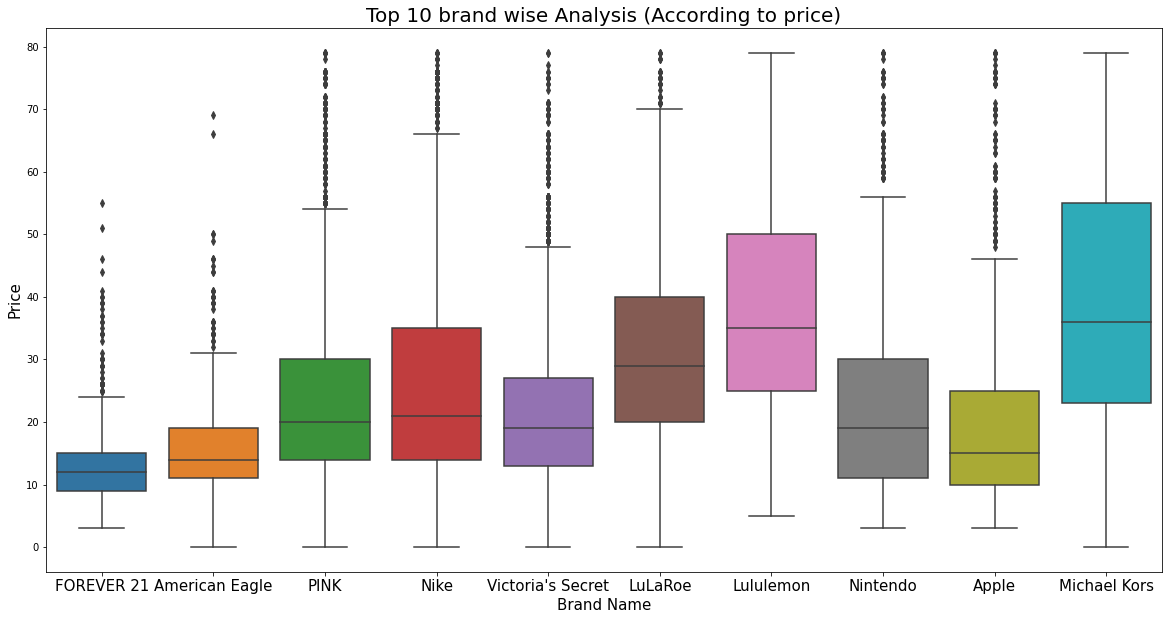

In [35]:
temp3 = temp2[temp2['price']<80]
plt.figure(figsize=(20,10))
sns.boxplot(temp3['brand_name'],temp3['price'])
plt.title("Top 10 brand wise Analysis (According to price)",fontsize=20)
plt.xlabel("Brand Name",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation = 0,wrap = True,fontsize = 15)

In [36]:
temp3.groupby(['brand_name'])['price'].agg('median')

brand_name
American Eagle       14.0
Apple                15.0
FOREVER 21           12.0
LuLaRoe              29.0
Lululemon            35.0
Michael Kors         36.0
Nike                 21.0
Nintendo             19.0
PINK                 20.0
Victoria's Secret    19.0
Name: price, dtype: float64

Michael Kors products cost high hence less bought
Lululemon has the 2nd highest median price
Pink, Nike and Victoria's Secret products have moderate pricing hence are more frequently bought

# Item Condition

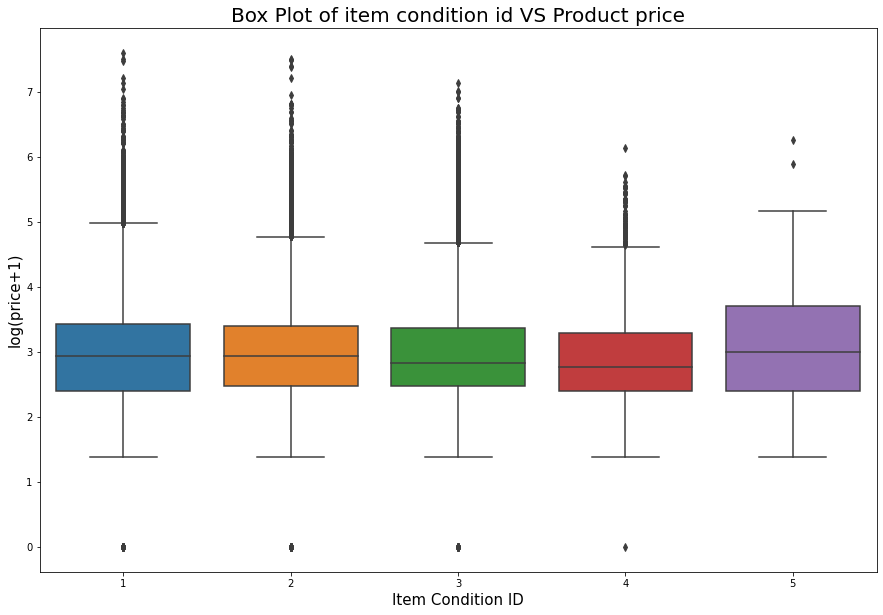

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data1['item_condition_id'], y=np.log1p(data1.price))
plt.title('Box Plot of item condition id VS Product price',fontsize=20)
plt.xlabel('Item Condition ID',fontsize=15)
plt.ylabel('log(price+1)',fontsize=15)
plt.show()

In [38]:
data1.groupby(['item_condition_id'])['price'].agg('median')

item_condition_id
1    18.0
2    18.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

The median of Item condition as 5 is higher than the others which states that items with item condition 5 were more expensive than others

# Applying Machine Learning Models¶

In [39]:
data2 = data1.loc[data1['price'] > 0]

In [40]:
data2.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,Main_categ,sub_categ1,sub_categ2
0,0,Hero 77 fountain pen,2,Other/Office supplies/Writing,Unknown,12.0,1,Other,Office supplies,Writing
1,1,14K Yellow Gold Earrings,3,Women/Jewelry/Earrings,Unknown,20.0,0,Women,Jewelry,Earrings
2,2,New balance 2-in 1 size S dry fit shorts,2,Women/Athletic Apparel/Shorts,New Balance,10.0,0,Women,Athletic Apparel,Shorts
3,3,Zella black workout tank w mesh cut out,3,Women/Athletic Apparel/Shirts & Tops,Zella,15.0,1,Women,Athletic Apparel,Shirts & Tops
4,4,NWT Lilly Pulitzer gabby dress sz 8,1,"Women/Dresses/Above Knee, Mini",Lilly Pulitzer,75.0,0,Women,Dresses,"Above Knee, Mini"


# SEPARATING DEPENDENT & INDEPENDENT VARIABLES

In [41]:
feature_cols = ['item_condition_id', 'Main_categ', 'sub_categ1','sub_categ2', 'brand_name', 'shipping']
x = data2[feature_cols] # Independent variables
y = np.log(data2['price']) # Dependent variable

# One Hot Encoding

In [42]:
cat_name = pd.get_dummies(data2["Main_categ"], drop_first=True) # drop_first=True means dropping the redundant column
brd_name = pd.get_dummies(data2["brand_name"], drop_first=True)
sub1_name = pd.get_dummies(data2["sub_categ1"], drop_first=True)
sub2_name = pd.get_dummies(data2["sub_categ2"], drop_first=True)

# removing the categorical columns
x.drop(['Main_categ', 'brand_name','sub_categ1', 'sub_categ2'], axis=1, inplace=True)
x1 = pd.concat([x, cat_name, brd_name, sub1_name, sub2_name], axis=1)


In [43]:
x1.head()

,item_condition_id,shipping,Electronics,Handmade,Home,Kids,Men,Other,Sports & Outdoors,Vintage & Collectibles,...,Women,Wool,Work & Safety,Wrap,Wristlet,Writing,Yarn,Yoga & Pilates,iPad/Tablet/eBook Access,iPad/Tablet/eBook Readers
0,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=10)


In [45]:
print(x_train.shape)

(103718, 3182)


In [46]:
print(x_test.shape)

(44451, 3182)


In [47]:
print(y_train.shape)

(103718,)


In [48]:
x_train
y_test

102367    4.488636
113729    2.484907
85279     2.639057
135452    2.708050
144893    2.302585
            ...   
36951     4.110874
144361    3.871201
48855     2.995732
119200    2.079442
101807    2.772589
Name: price, Length: 44451, dtype: float64

In [49]:
y_train

63007     2.484907
98768     2.639057
117074    2.302585
17071     3.258097
113431    4.248495
            ...   
9377      2.484907
105652    3.367296
93604     2.708050
94786     2.772589
83254     2.944439
Name: price, Length: 103718, dtype: float64

# SGD

In statistics, machine learning and data science fields, we optimize a lot of stuff
When we fit a line with linear regression, we optimize the slope and intercept.

In logistic regression, we optimize the squiggly line
In a similar way Gradient descent also helps optimize such things and much more
In this case we have almost half billion data points and hence computations can take a long time
This method uses a randomly selected subset of data at every step rather than full dataset
This reduces the time spent calculating derivatives of loss function (Sum of squared Residuals)

In [53]:
#Hyperparameter Tuning for SGD
# parameters = {"alpha": [0.01,0.1,0,1,10,100],
#               "l1_ratio": [0.4,0.5,0.6,0.7,0.8],
#               }
#
# model_sgd = SGDRegressor(loss="squared_loss",penalty="l2",
#                          learning_rate="invscaling",max_iter=100,
#                          fit_intercept=False)
#
# model_SGD = GridSearchCV(model_sgd,param_grid=parameters)
# model_SGD.fit(x_train,y_train)


# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# print(model_SGD.best_params_)
# Output -  {'alpha': 0, 'l1_ratio': 0.4}


from sklearn.linear_model import SGDRegressor,Ridge


model_SGD = SGDRegressor(loss="squared_loss",penalty="l2",
                         learning_rate="invscaling",max_iter=100,
                         fit_intercept=False,alpha=0,l1_ratio=0.4)

model_SGD.fit(x_train,y_train)
y_pred_train_sgd = model_SGD.predict(x_train)
y_pred_test_sgd = model_SGD.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train_sgd))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test_sgd))
print("RMSLE value of Training Data is {a}".format(a=rmse_train))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test))

RMSLE value of Training Data is 0.6345721286517516
RMSLE value of Testing Data is 0.6422039384908628


RMSLE ERROR IN THIS CASE IS 0.64

# LINEAR REGRESSION

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [67]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print(y_pred_test)
from sklearn.metrics import mean_squared_error
print("RMSLE value of Training Data is {a}".format(a=np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("RMSLE value of Testing Data is {a}".format(a=np.sqrt(mean_squared_error(y_test,y_pred_test))))


[3.3239092  2.75014281 2.59960668 ... 3.07518694 2.92153083 3.42838332]
RMSLE value of Training Data is 0.5998275347420792
RMSLE value of Testing Data is 1903578921.47523


# INSIGHTS FROM LINEAR MODEL

We can observe that training data has very less rmsle but the testing data the rmsle is extremely high. The data is containing multi-collinearity which can be seen in the RMSLE of testing data

# SOLUTION

Almost 99% of our columns are the dummies representing the categorical data and we cannot remove them 
Hence, we have to use algorithms which we can fine tune to optimize our model
This leads us to a conclusion that there is a need to build models which can help us apply techniques like Dimension reduction, Regularization, Boosting or Bagging. Let's check them out one by one
In ML, the ideal model is the one which has low bias i.e it can capture true relationship and low variability by producing consistent predictions across different datasets
The methods used to do this are Regularization (LASSO & RIDGE), Boosting or Bagging

In [55]:
pip install PrettyTable

# LASSO REGRESSION

In [50]:

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1 , max_iter=1)
lasso_reg.fit(x_train , y_train)


Lasso(alpha=0.1, max_iter=1)

In [52]:
y_pred = lasso_reg.predict(x_test)
y_pred_train = lasso_reg.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error
rmse_test_lasso = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_train_lasso = np.sqrt(mean_squared_error(y_train,y_pred_train))
print("RMSLE value of Training Data is {a}".format(a=rmse_test_lasso))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_lasso))

RMSLE value of Training Data is 0.7904728770969459
RMSLE value of Testing Data is 0.7904728770969459


RMSLE in this case is 0.7905

# RIDGE REGRESSION

Ridge Regression comes under the Reglarization method It provides a way to create a simple model with great explanatory power when number of predictor variables in a dataset are very high and not very significant or when a datset has multi-collinearity It uses a type of Shrinkage Parameter called ridge estimator which belongs to a class of L2 regularization (λ) L2 regularization adds a penalty which equals the square of the magnitude of co-efficient All co-effs are shrunk by the same factor When λ = 0, ridge regression equals least squares regression and when λ = infinity, all co-effs are shrunk to 0 Our goal here is to find the perfect λ value because as λ increases, error due to bias increases and as λ decreases, error due to variance increases

In [53]:
# from sklearn.model_selection import GridSearchCV
# parameters = {"alpha":[0.01,0.1,0,1,10,100]}
# ridgeReg = Ridge(solver = "lsqr", fit_intercept=False)
# lr_reg = GridSearchCV(ridgeReg,param_grid =parameters,n_jobs=-1)
# lr_reg.fit(x_train, y_train)

# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# lr_reg.best_params_
# Output- {'alpha': 0.1}



from sklearn.linear_model import Ridge


ridgeReg = Ridge(alpha=0.1,solver="lsqr",fit_intercept=False)
ridgeReg.fit(x_train,y_train)

y_pred = ridgeReg.predict(x_test)
y_pred_train = ridgeReg.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error
rmse_test_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_train_ridge = np.sqrt(mean_squared_error(y_train,y_pred_train))
print("RMSLE value of Training Data is {a}".format(a=rmse_train_ridge))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_ridge))

RMSLE value of Training Data is 0.6130745858747917
RMSLE value of Testing Data is 0.6247987073775453


RMSLE in this case is 0.62

# FINAL CONCLUSION

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Models", "HyperParameters used",  "RMSLE"]


x.add_row(["Linear Regression", "---", 1903578921.47523])
x.add_row(["Ridge Regression", "alpha", 0.6247987073775453])
x.add_row(["Lasso Regression","alpha" ,0.7904728770969459]) 
x.add_row(["SGD Regressor","alpha, l1_ratio" , 0.6422039384908628]) 
print(x)

+-------------------+----------------------+--------------------+
|       Models      | HyperParameters used |       RMSLE        |
+-------------------+----------------------+--------------------+
| Linear Regression |         ---          |  1903578921.47523  |
|  Ridge Regression |        alpha         | 0.6247987073775453 |
|  Lasso Regression |        alpha         | 0.7904728770969459 |
|   SGD Regressor   |   alpha, l1_ratio    | 0.6422039384908628 |
+-------------------+----------------------+--------------------+


RMSLE  very high for linear model which led to regularisation model (Lasso & ridge), also SGD has been implemented for the same. For Ridge, lasso and sgd, hyperparameter tuning has been condcted so as to reach onto a proper conclusion for the selection of alpha parameters . 

The least error out of these models is that of Ridge Regression 
Hence this model can be deployed at the client machine so that sellers can get an estimate of the price they should set for their products
